In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
#since id is not contributing anything we can drop it
df.drop('id', axis=1, inplace=True)
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
df.columns=['age','blood_pressure','specific_gravity','albumin', 'sugar','red_blood_cells','pus cell',
            'pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium',
           'potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
           'hypertension','diabetes_mallitus','coronary_artery_disease','appetite','peda_edema',
           'anemia','class']
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mallitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

In [12]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mallitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
anemia                      object
class                       object
dtype: object

In [13]:
df['packed_cell_volume'] 

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [14]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [15]:
#\t? and \t43 is making the col object  
#if we still want to convert to numeric val col then

df['packed_cell_volume']=pd.to_numeric(df['packed_cell_volume'],errors='coerce')#coerce simply means supress orignore the error
df['packed_cell_volume'].dtype

dtype('float64')

In [16]:
#now it became float ... All \t values are converted to nan
df['packed_cell_volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [17]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [18]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
df['white_blood_cell_count'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [19]:
df['white_blood_cell_count'].dtype

dtype('float64')

In [21]:
df['red_blood_cell_count'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [22]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors='coerce')
df['red_blood_cell_count'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1,
       5.8, 5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [23]:
df['red_blood_cell_count'].dtype

dtype('float64')

In [25]:
#lets separate categorical and numerical cols for EDA 
cat_cols = [col for col in df.columns if df[col].dtype=='object']
cat_cols

['red_blood_cells',
 'pus cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mallitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

In [26]:
num_cols = [col for col in df.columns if df[col].dtype!='object']
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [27]:
#to get unique values from each cols 
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values\n')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mallitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [28]:
#in the above vals there are a few \t ones so lets replace them
df['diabetes_mallitus'].replace(to_replace = {' yes':'yes', '\tno':'no', '\tyes':'yes'},inplace = True)
df['diabetes_mallitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [30]:
df['coronary_artery_disease'].replace(to_replace = {'\tno':'no'},inplace = True)#inplace = true to modify the original data set
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [31]:
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace = True)
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [32]:
#lets convert class to numeric val
df['class'] = df['class'].map({'ckd':1,'notckd':0})
df['class'].dtype

dtype('int64')

In [34]:
for col in cat_cols:
    print(f'{col} unique values are {df[col].unique()}\n')

red_blood_cells unique values are [nan 'normal' 'abnormal']

pus cell unique values are ['normal' 'abnormal' nan]

pus_cell_clumps unique values are ['notpresent' 'present' nan]

bacteria unique values are ['notpresent' 'present' nan]

hypertension unique values are ['yes' 'no' nan]

diabetes_mallitus unique values are ['yes' 'no' nan]

coronary_artery_disease unique values are ['no' 'yes' nan]

appetite unique values are ['good' 'poor' nan]

peda_edema unique values are ['no' 'yes' nan]

anemia unique values are ['no' 'yes' nan]

class unique values are [1 0]



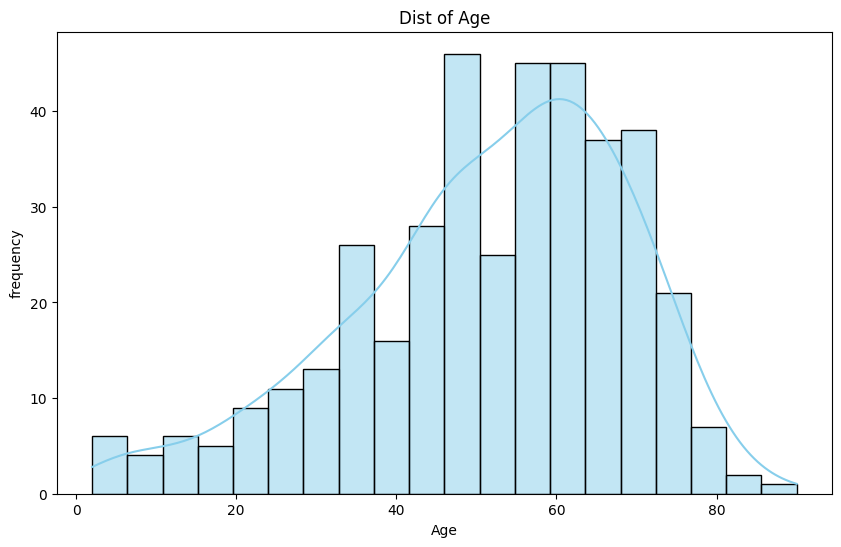

In [36]:
#univariate analysis

plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(),kde=True,bins =20 , color = 'skyblue')
plt.title('Dist of Age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

<Axes: xlabel='hypertension', ylabel='count'>

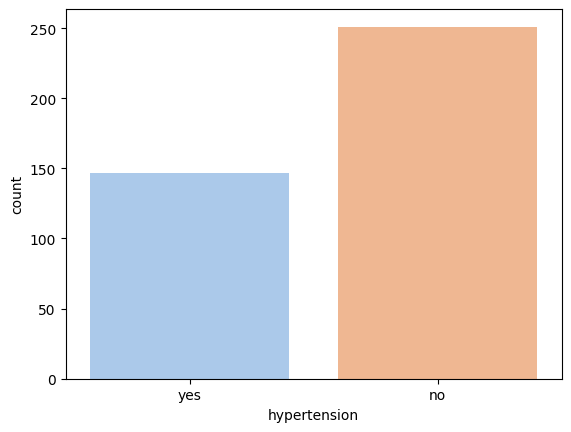

In [37]:
sns.countplot(x = 'hypertension',data = df, palette ='pastel' )

<Axes: xlabel='class', ylabel='blood_urea'>

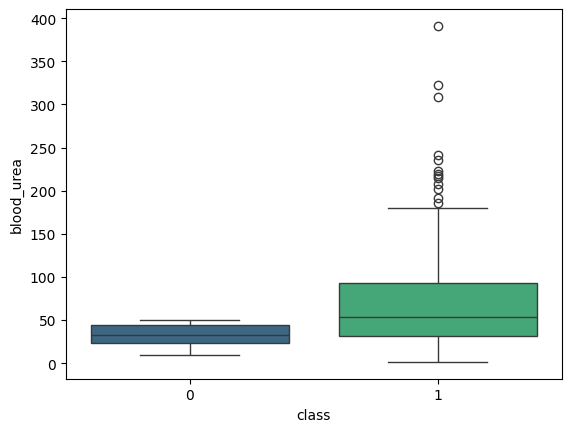

In [38]:
sns.boxplot(x = 'class', y='blood_urea', data=df, palette='viridis' )

<Axes: ylabel='count'>

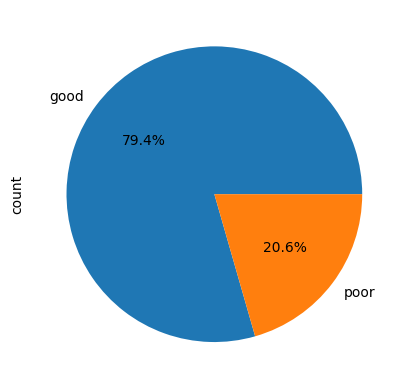

In [40]:
#pie chart
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='count'>

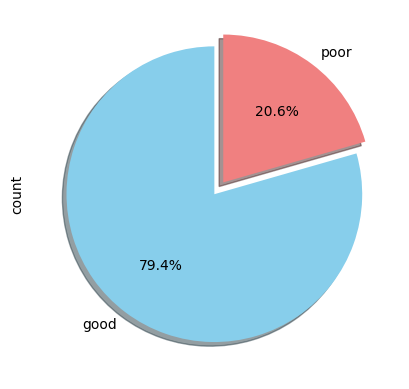

In [41]:
#more beautiful piechart
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%',colors=['skyblue','lightcoral'], explode = (0,0.1),shadow = True, startangle=90)

<Axes: ylabel='count'>

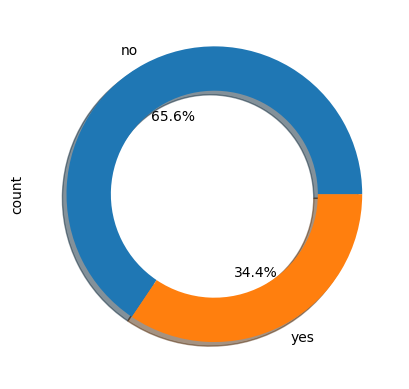

In [43]:
#donut plot
df['diabetes_mallitus'].value_counts().plot.pie(autopct = '%1.1f%%', wedgeprops = dict(width =0.3),shadow=True)

<Axes: xlabel='age', ylabel='blood_pressure'>

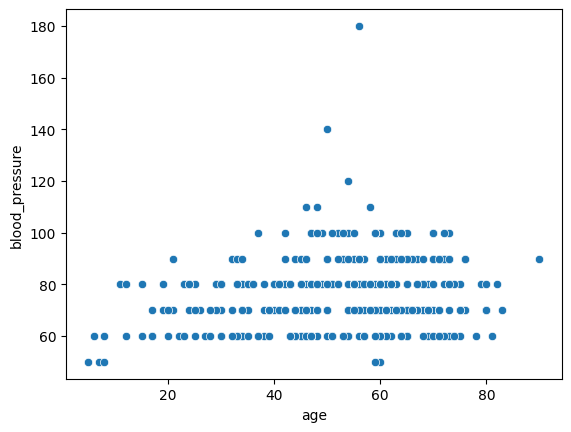

In [44]:
#bivariate analysis
sns.scatterplot(x = 'age', y='blood_pressure',data =df)

<Axes: xlabel='age', ylabel='blood_pressure'>

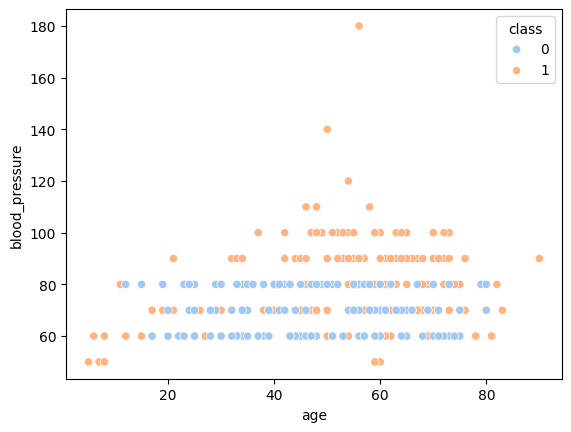

In [45]:
sns.scatterplot(x = 'age', y='blood_pressure', data=df, hue = 'class', palette='pastel')

In [46]:
#stacked bar chart
pd.crosstab(df['diabetes_mallitus'],df['hypertension'])
#crosstab summarizes the data

hypertension,no,yes
diabetes_mallitus,,
no,220,41
yes,31,106


<Axes: xlabel='diabetes_mallitus'>

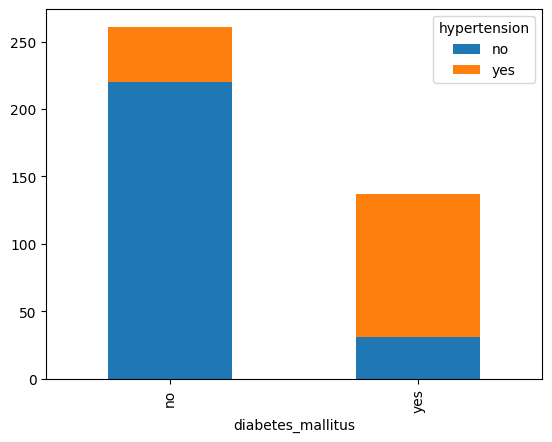

In [47]:
dh = pd.crosstab(df['diabetes_mallitus'],df['hypertension'])
dh.plot(kind = 'bar', stacked = True)

In [50]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mallitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

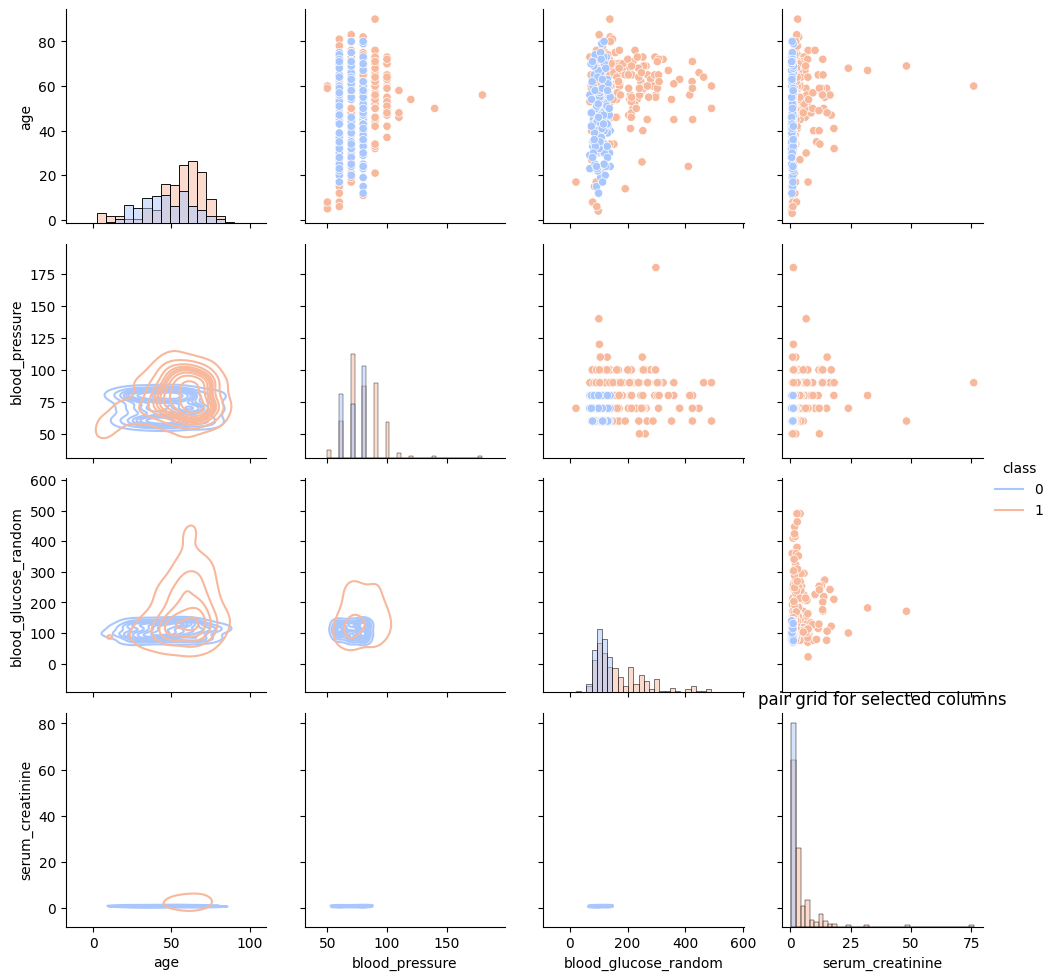

In [52]:
#multivariate analysis
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
g=sns.PairGrid(df[cols], hue='class', palette='coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title('pair grid for selected columns')
plt.show()